In [3]:
import misc
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# Use PGF backend for LaTeX
matplotlib.use('pgf')
matplotlib.rcParams.update({
    'pgf.texsystem': 'pdflatex',
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

filename = 'resnet18_224'

history = pd.read_csv('./output/224/resnet18_cub_size224_onecycle.csv')
misc.plot_history(history)

plt.savefig('output/figures/{filename}.pgf'.format(filename=filename))

/home/bertie/Documents/University/RP3/code/misc.py:68: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [2]:
from torchsummary import summary
from models.wideresnet import WideResNet
from models import models
model = models.get_model(cfg, 3, 100).to('cuda')
summary(model, (3, 224, 224))

UnboundLocalError: local variable 'model' referenced before assignment

In [2]:
import datasets.cub as cub
import datasets.flowers as flowers
from datasets.transforms import train_transform, test_transform
from torch.utils.data import DataLoader

datasets = cub.get_datasets(224, download=False)

train = DataLoader(datasets['train'], batch_size=64, shuffle=False)
unknown = DataLoader(datasets['test_unknown'], batch_size=64)
val = DataLoader(datasets['val'], batch_size=64)
known = DataLoader(datasets['test_known'], batch_size=64)

In [9]:
len(datasets['test_unknown'])

2378

In [10]:
class_dict = dict()
for X,y in datasets['test_known']:
    if y in class_dict:
        class_dict[y] += 1
    else:
        class_dict[y] = 1

(array([ 7., 11., 19., 21., 39., 19., 21.,  7., 14.,  2.]),
 array([ 5. ,  6.5,  8. ,  9.5, 11. , 12.5, 14. , 15.5, 17. , 18.5, 20. ]),
 <BarContainer object of 10 artists>)

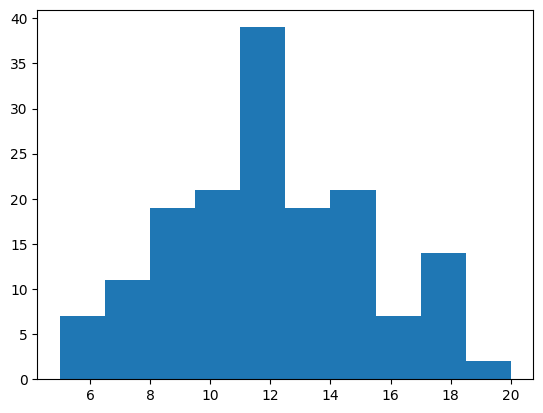

In [11]:
import matplotlib.pyplot as plt
class_dict
plt.hist(class_dict.values())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


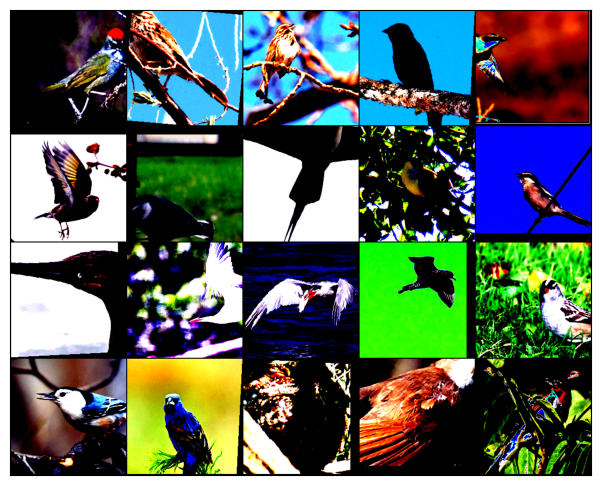

In [7]:
from utils import show_batch
show_batch(train)

In [3]:
from datasets.get_stats import get_stats

mean, std = get_stats(train)

100%|██████████| 93/93 [00:24<00:00,  3.76it/s]


In [4]:
print(mean, std)

tensor([0.0309, 0.0163, 0.0169]) tensor([1.0012, 1.0026, 1.0069])
